In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd '/content/gdrive/My Drive/NLPMaster'

/content/gdrive/My Drive/NLPMaster


In [0]:
import pickle
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras import metrics
import numpy as np
#Custom packages
from custom_metrics import *
from confusion_matrix_pretty_print import print_confusion_matrix
from plotting_lc import *
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
with open('processed_data/X_resampled.pkl','rb') as f:
  X_resampled = pickle.load(f)

with open('processed_data/y_resampled.pkl','rb') as f:
  y_resampled = pickle.load(f)

with open('processed_data/X_test.pkl','rb') as f:
  X_test = pickle.load(f)

with open('processed_data/y_test.pkl','rb') as f:
  y_test = pickle.load(f)


In [0]:
labels = np.unique(y_test)
labels

array(['NEG', 'NEUTRAL', 'OBJ', 'POS'], dtype='<U7')

In [0]:
onehotencoder = OneHotEncoder(categories='auto')
onehotencoder.fit(labels.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [0]:
y_resampled_onehot = onehotencoder.transform(np.array(y_resampled).reshape(-1, 1)).toarray()
y_test_onehot = onehotencoder.transform(np.array(y_test).reshape(-1, 1)).toarray()

In [0]:
plot = PlotLearning()

<Figure size 432x288 with 0 Axes>

In [0]:
sequence_length = 50
embedding_dim = 300
dropout_prob = (0.5, 0.7, 0.7, 0.5)
filter_sizes = (2, 3, 4)
num_filters = 10
hidden_dims_1 = 50
hidden_dims_2 = 26
hidden_dims_3 = 50
output_dim = 4

input_shape = (sequence_length, embedding_dim)

model_input = Input(shape=input_shape)
z = model_input
z = Dropout(dropout_prob[0])(z)

conv_blocks = []
for sz in filter_sizes:
  conv = Convolution1D(filters=num_filters,
                        kernel_size=sz,
                        padding="valid",
                        activation="relu",
                        strides=1)(z)
  conv = MaxPooling1D(pool_size=2)(conv)
  conv = Flatten()(conv)
  conv_blocks.append(conv)

z = Concatenate()(conv_blocks)
#z = Dropout(dropout_prob[1])(z)
z = Dense(hidden_dims_1, activation="relu")(z)
z = Dropout(dropout_prob[1])(z)
z = Dense(hidden_dims_2, activation="relu")(z)
z = Dropout(dropout_prob[2])(z)
model_output = Dense(output_dim, activation="softmax")(z)

model = Model(model_input, model_output)
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", f1])

W0828 02:28:59.333865 140631401473920 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 50, 300)      0                                            
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 50, 300)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 49, 10)       6010        dropout_7[0][0]                  
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 48, 10)       9010        dropout_7[0][0]                  
__________________________________________________________________________________________________
conv1d_9 (

Train on 21408 samples, validate on 2002 samples
Epoch 1/15
 - 9s - loss: 0.5775 - acc: 0.7467 - f1: 0.0149 - val_loss: 0.5608 - val_acc: 0.7500 - val_f1: 0.0000e+00


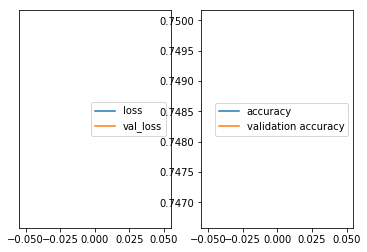

Epoch 2/15
 - 8s - loss: 0.5605 - acc: 0.7508 - f1: 0.0144 - val_loss: 0.5580 - val_acc: 0.7499 - val_f1: 0.0000e+00


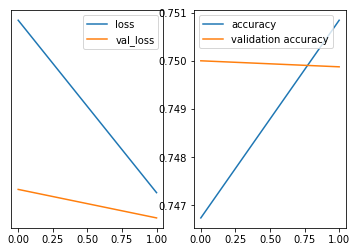

Epoch 3/15
 - 8s - loss: 0.5571 - acc: 0.7519 - f1: 0.0326 - val_loss: 0.5555 - val_acc: 0.7495 - val_f1: 9.6058e-04


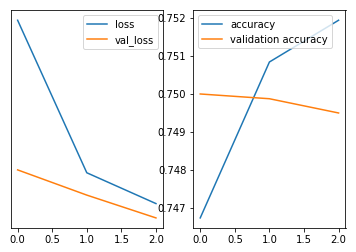

Epoch 4/15
 - 8s - loss: 0.5508 - acc: 0.7548 - f1: 0.0639 - val_loss: 0.5532 - val_acc: 0.7496 - val_f1: 0.0171


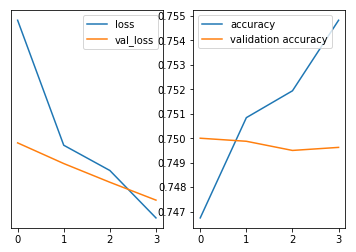

Epoch 5/15
 - 10s - loss: 0.5376 - acc: 0.7607 - f1: 0.1183 - val_loss: 0.5371 - val_acc: 0.7498 - val_f1: 0.0321


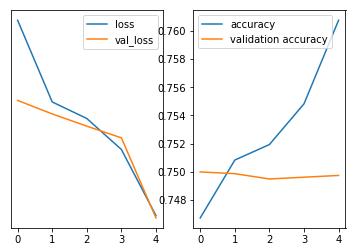

Epoch 6/15
 - 10s - loss: 0.5222 - acc: 0.7658 - f1: 0.1628 - val_loss: 0.5330 - val_acc: 0.7480 - val_f1: 0.0412


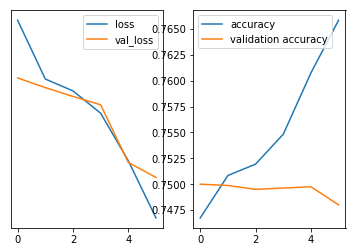

Epoch 7/15
 - 10s - loss: 0.5102 - acc: 0.7700 - f1: 0.1956 - val_loss: 0.5154 - val_acc: 0.7461 - val_f1: 0.0522


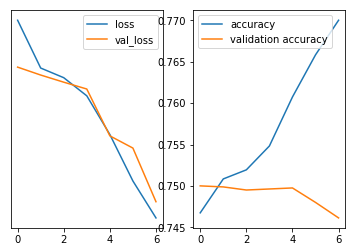

Epoch 8/15
 - 10s - loss: 0.4959 - acc: 0.7745 - f1: 0.2304 - val_loss: 0.5246 - val_acc: 0.7458 - val_f1: 0.0614


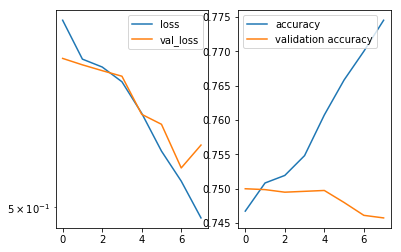

Epoch 9/15
 - 10s - loss: 0.4865 - acc: 0.7784 - f1: 0.2530 - val_loss: 0.5239 - val_acc: 0.7502 - val_f1: 0.0849


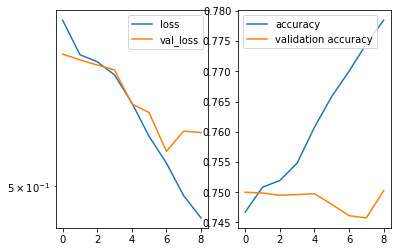

Epoch 10/15
 - 10s - loss: 0.4740 - acc: 0.7822 - f1: 0.2785 - val_loss: 0.5193 - val_acc: 0.7514 - val_f1: 0.1135


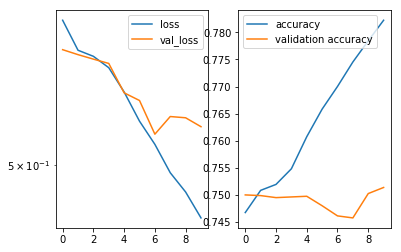

Epoch 11/15
 - 10s - loss: 0.4643 - acc: 0.7843 - f1: 0.2941 - val_loss: 0.5004 - val_acc: 0.7685 - val_f1: 0.2056


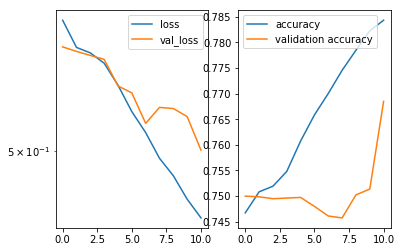

Epoch 12/15
 - 10s - loss: 0.4555 - acc: 0.7878 - f1: 0.3136 - val_loss: 0.5228 - val_acc: 0.7591 - val_f1: 0.1705


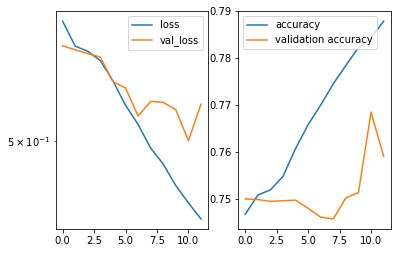

Epoch 13/15
 - 10s - loss: 0.4476 - acc: 0.7910 - f1: 0.3298 - val_loss: 0.5073 - val_acc: 0.7706 - val_f1: 0.2316


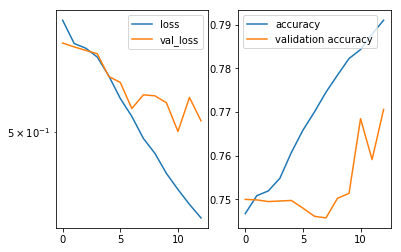

Epoch 14/15
 - 10s - loss: 0.4413 - acc: 0.7924 - f1: 0.3401 - val_loss: 0.4928 - val_acc: 0.7853 - val_f1: 0.3098


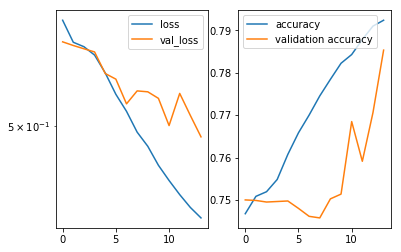

Epoch 15/15
 - 10s - loss: 0.4328 - acc: 0.7958 - f1: 0.3576 - val_loss: 0.4965 - val_acc: 0.7832 - val_f1: 0.3143


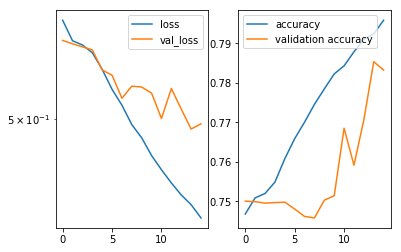

In [0]:
batch_size = 50
num_epochs = 15
#num_epochs = 5

model.fit(X_resampled, y_resampled_onehot, batch_size=batch_size, epochs=num_epochs,
          validation_data=(X_test, y_test_onehot), verbose=2, callbacks=[plot])

In [0]:
plot_model(model, to_file='model.png')

In [0]:
model.save('model_CNN_static.h5')

In [0]:
#model2 = load_model('model_CNN_static.h5',  custom_objects={
#        "f1": f1
#    })

In [0]:
y_true = y_test_onehot.argmax(axis=-1)
y_pred = model.predict(X_test).argmax(axis=-1)

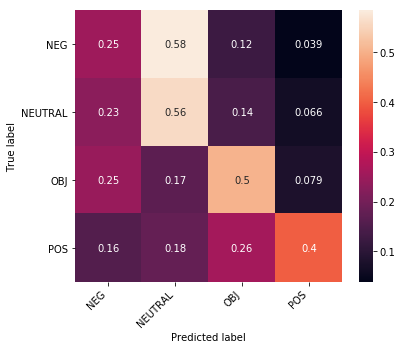

In [0]:
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = print_confusion_matrix(cm_norm, labels, figsize = (6, 5), fontsize=10)
fig.savefig('CNN_static.png')